## Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
#importing requried libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset using pandas
data=pd.read_csv('Fraud_check.csv')

## Performing EDA

In [3]:
#displaying  first 5 records 
data.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [4]:
#displaying last 5 records
data.tail()

Undergrad Marital.Status  Taxable.Income  City.Population  \
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO

In [5]:
#shape of dataset
data.shape   

(600, 6)

Dataset has `600` rows and `6` columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


#### As we can see that from the infomation the dataset having float,int and object datatypes.But Random Forest is classification model algorithm it will only allows categorical data.So, in our case we have target class is sales.So, we are going to convert it into categorical type for further analysis

In [7]:
data.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

#### The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [8]:
data.ndim

2

In [9]:
data.axes

[RangeIndex(start=0, stop=600, step=1),
 Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
        'Work.Experience', 'Urban'],
       dtype='object')]

In [10]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [11]:
data.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [12]:
#Checking for missing data
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### The dataset having no any NA values

In [13]:
#checking for duplicated values
data[data.duplicated()].shape

(0, 6)

### No any record has been duplicated

In [14]:
#renaming the columns
data=data.rename({'Marital.Status':'Marital_S','Taxable.Income':'Tax_Inc',
                  'City.Population':'Pop','Work.Experience':'Work_Exp'},axis=1)

In [15]:
data.head()

Undergrad Marital_S  Tax_Inc     Pop  Work_Exp Urban
0        NO    Single    68833   50047        10   YES
1       YES  Divorced    33700  134075        18   YES
2        NO   Married    36925  160205        30   YES
3       YES    Single    50190  193264        15   YES
4        NO   Married    81002   27533        28    NO

In [16]:
col_names=['Undergrad', 'Marital_S','Urban']

for col in col_names:
    
    print(data[col].value_counts())  

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital_S, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64


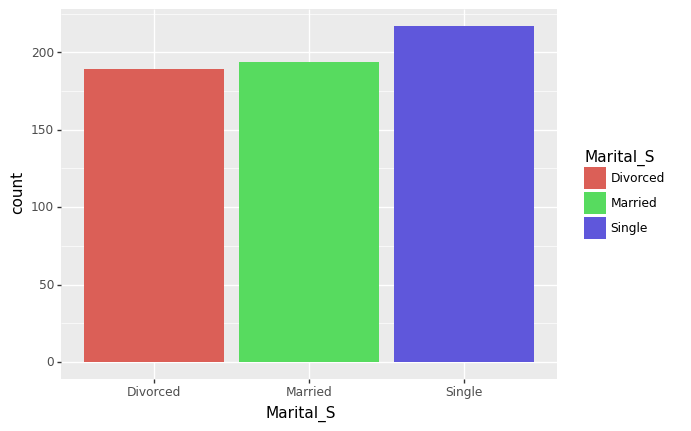

<ggplot: (106354756437)>

In [17]:
from plotnine.data import huron
from plotnine import ggplot, aes, stat_bin, geom_bar

ggplot(data) + aes(x='Marital_S',fill='Marital_S') + geom_bar()

<h3>Observation:</h3>
In the Marital Status the number of Single are greater than other Categories<br>
The Divorced has low in numbers

In [18]:
data.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [19]:
fig = px.bar(data, x='Undergrad',title="Ratio of Undergrad", width=500,height=500,color="Undergrad")
fig.show()

<h4>Observations:</h4>
Those who are Undergraduate having a number of 312 and those are not Undergraduate are 288

In [20]:
data.Urban.value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [21]:
fig = px.bar(data, x='Urban',title="Resident in Urban", width=500,height=500,color="Urban")
fig.show()

<h4>Observations:</h4>
The number of residents who lived in Urban is 302 and non-residents are 298

In [22]:
conditions = [(data['Tax_Inc'] <= 30000),(data['Tax_Inc'] > 30000)]
choices = ['Risky','Good']

# create a new column or assign it to an existing
# the last param in np.select is default
data['Tax_Inc'] = np.select(conditions, choices)

In [23]:
data.head(15)

Undergrad Marital_S Tax_Inc     Pop  Work_Exp Urban
0         NO    Single    Good   50047        10   YES
1        YES  Divorced    Good  134075        18   YES
2         NO   Married    Good  160205        30   YES
3        YES    Single    Good  193264        15   YES
4         NO   Married    Good   27533        28    NO
5         NO  Divorced    Good  116382         0    NO
6         NO  Divorced    Good   80890         8   YES
7        YES    Single    Good  131253         3   YES
8         NO    Single    Good  102481        12   YES
9        YES  Divorced    Good  155482         4   YES
10        NO    Single   Risky  102602        19   YES
11        NO    Single    Good   94875         6   YES
12        NO  Divorced   Risky  148033        14   YES
13        NO   Married    Good   86649        16   YES
14        NO   Married    Good   57529        13   YES

In [24]:
data.Tax_Inc.value_counts()

Good     476
Risky    124
Name: Tax_Inc, dtype: int64

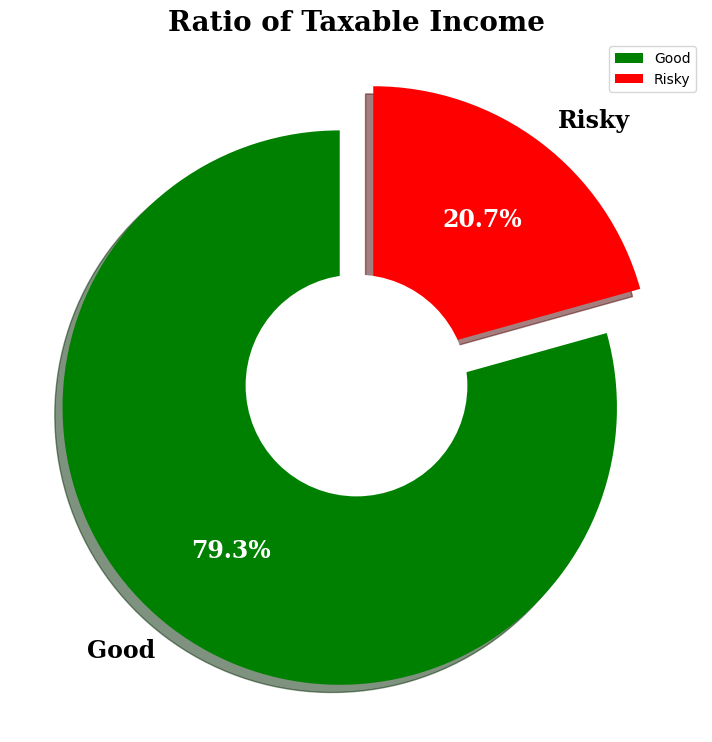

In [25]:
label_data=data['Tax_Inc'].value_counts()

explode=(0.1,0.1)
plt.figure(figsize=(15,9))
patches, texts, pcts= plt.pie(label_data,labels=label_data.index,colors=['green','red'],pctdistance=0.65,shadow=True,
                             startangle=90,explode=explode,autopct='%1.1f%%',
                             textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('Ratio of Taxable Income',size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Good','Risky'],loc="upper right")
plt.show()

<h4>Observations:</h4>
Pie graph is clearly showing the highest Ratio of Taxable Income is Good<br>
So, that we can assume there will be less chances of Fraud may occurs <br>
But there are 21% of Risk in the dataset we have to focus on that percentage also<br>
To optimism the risk<br>

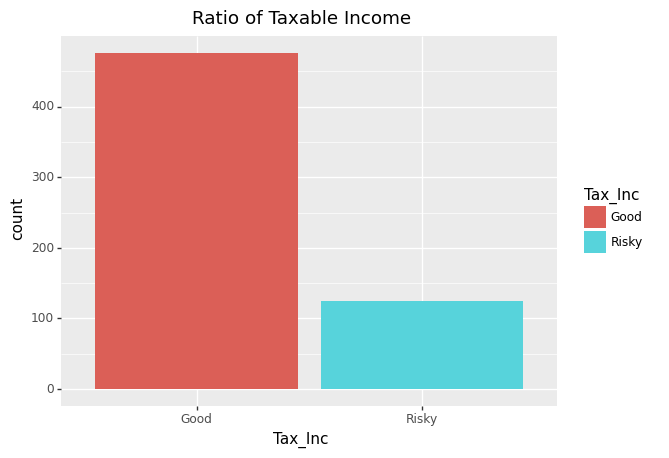

<ggplot: (106357240836)>

In [26]:
from plotnine.data import huron
from plotnine import ggplot, aes, stat_bin, geom_bar , ggtitle

ggplot(data) + aes(x='Tax_Inc',fill='Tax_Inc') + ggtitle("Ratio of Taxable Income") + geom_bar()

### Using Bar graph representing Ratio of Taxable Income

In [27]:
data.columns

Index(['Undergrad', 'Marital_S', 'Tax_Inc', 'Pop', 'Work_Exp', 'Urban'], dtype='object')

In [28]:
features = ['Undergrad', 'Marital_S','Work_Exp', 'Urban']

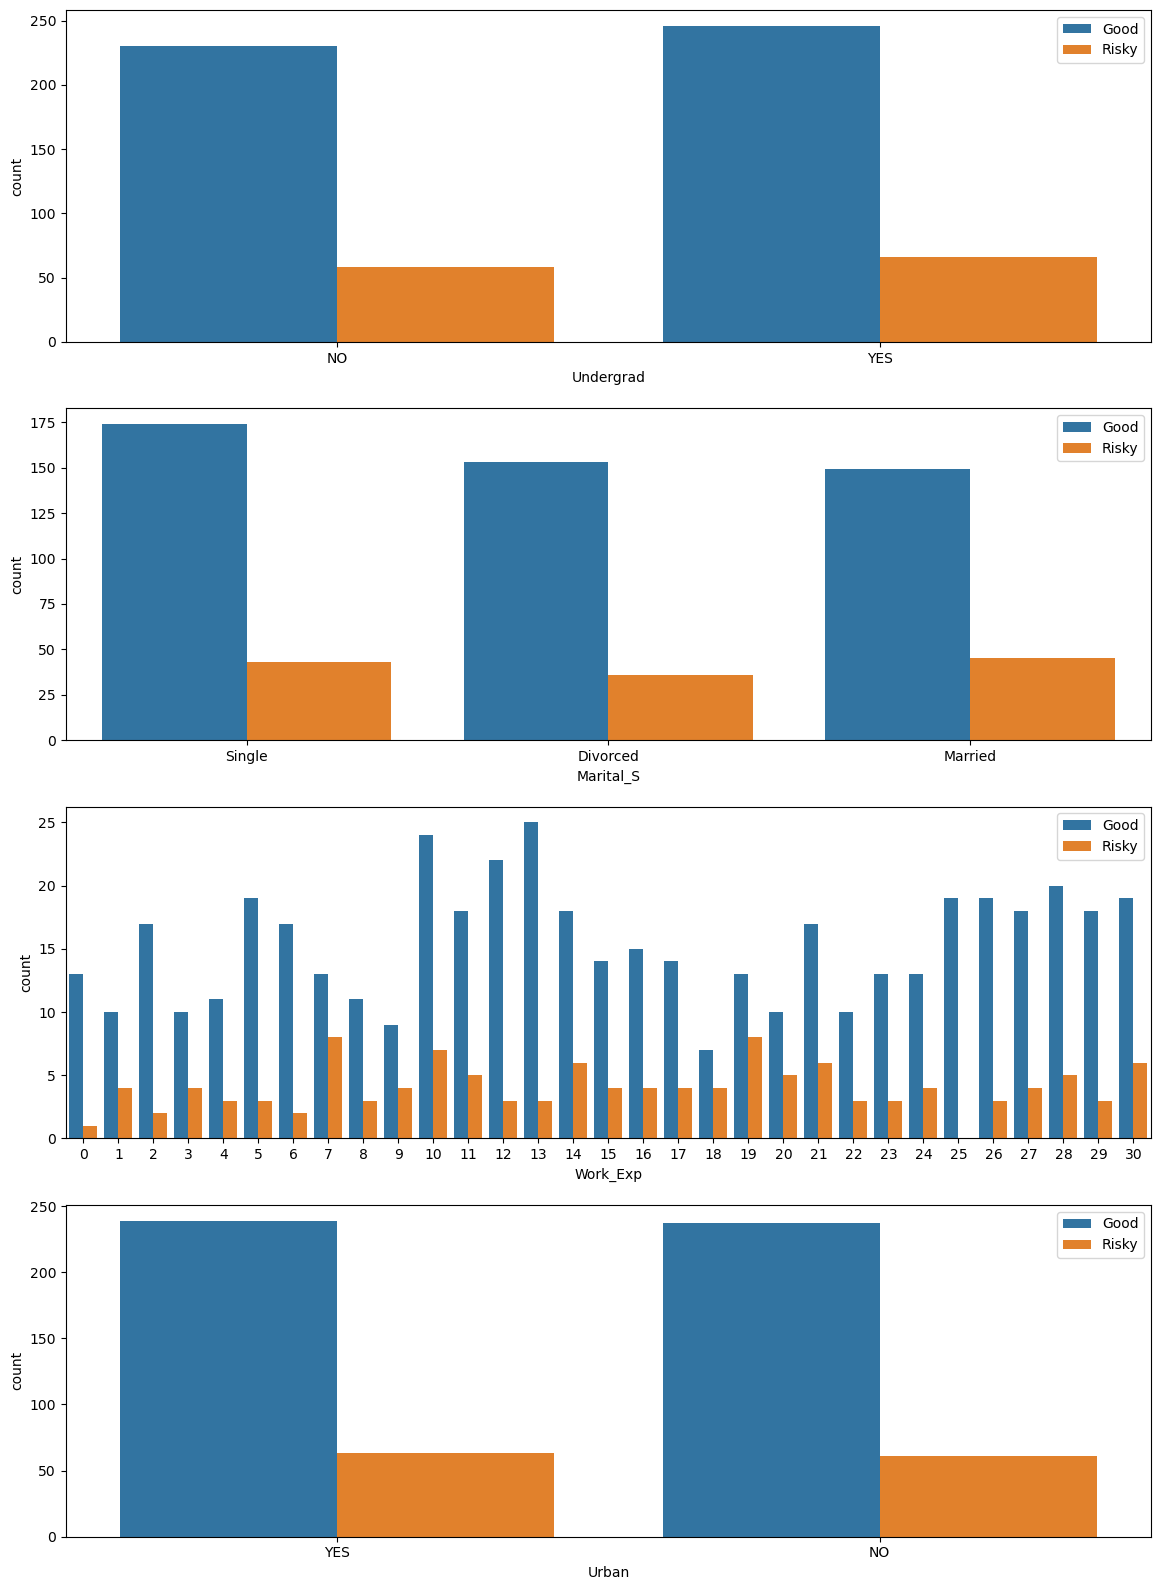

In [29]:
plt.figure(figsize=(14,25))
for i in enumerate(features):
    plt.subplot(5,1,i[0]+1)
    sns.countplot(i[1],hue='Tax_Inc',data=data)
    plt.legend(["Good","Risky"])
plt.show()    

<h4>Observations:</h4>
Those who are Undergraduate having a high count of Taxable Income as Good but there is some ratio of Risk also available<br>
Those who are not Undergraduate having a high count of Taxable Income as Good but little smaller than undergraduate<br>
The people who are single has high good taxable income than divorced and married<br>
but those who are married and single has high risk count<br>
those having the work experience between 10 to 13 years have good taxable income<br>
Peoples lives in urban and not lived in urban having nearly same taxable income as well as risk count<br>


In [30]:
continue_col=['Pop','Work_Exp']

In [31]:
category_col=['Undergrad', 'Marital_S', 'Tax_Inc','Urban']

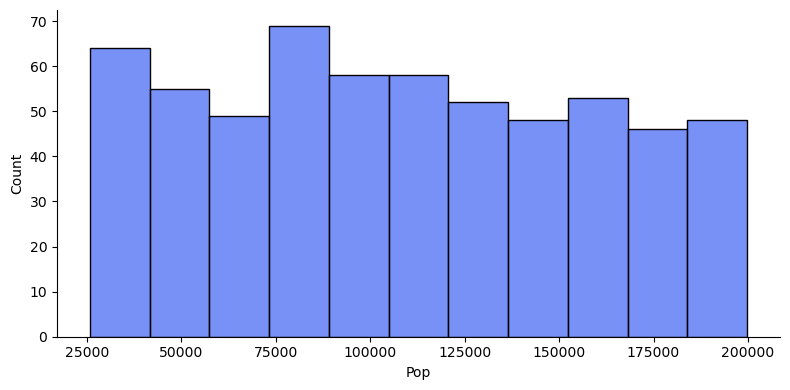

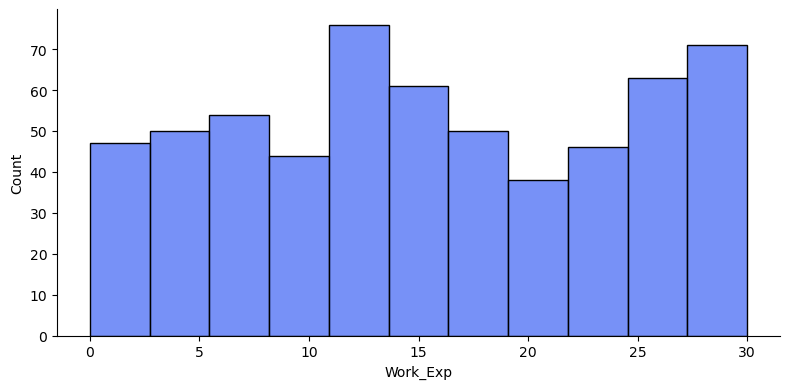

In [32]:
for cols in continue_col:
    sns.displot(data=data,x=cols,height=4,aspect=2,color='#496DF5')
plt.show()    

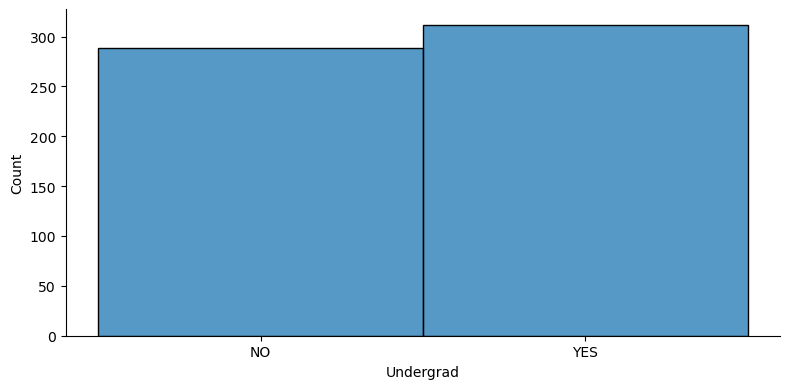

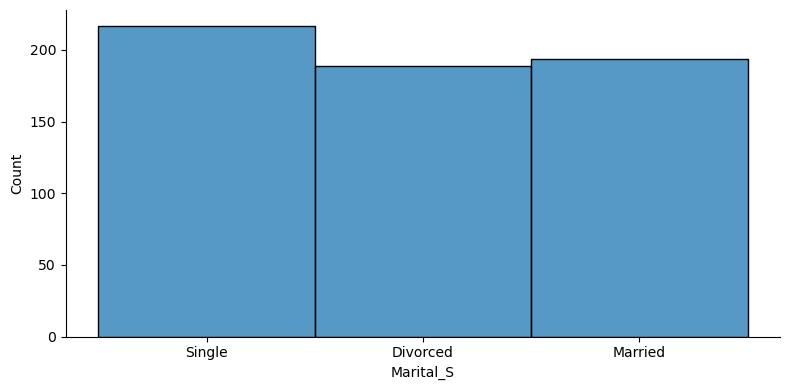

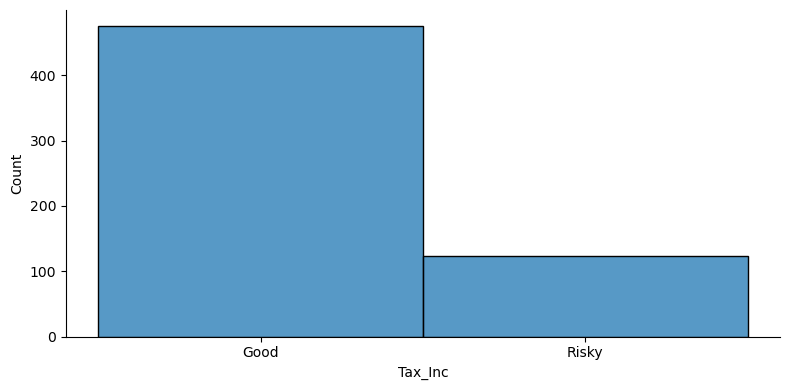

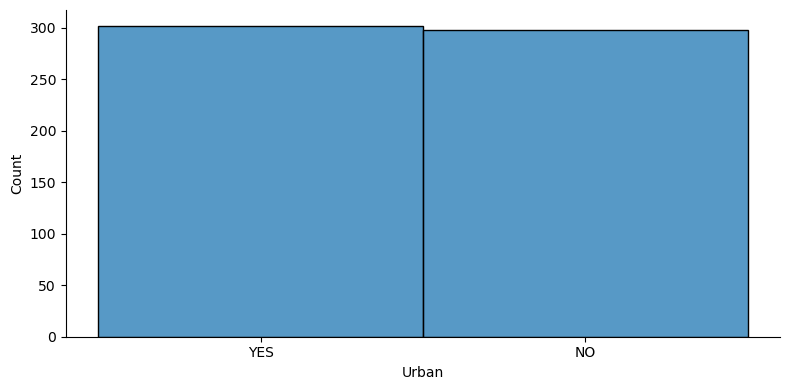

In [33]:
for cols in category_col:
    sns.displot(data=data,x=cols,height=4,aspect=2,palette='deep')
plt.show()    

In [34]:
#Creating dummy vairables dropping first dummy variable
data=pd.get_dummies(data,columns=['Urban','Undergrad'], drop_first=True)

In [35]:
data.head()

Marital_S Tax_Inc     Pop  Work_Exp  Urban_YES  Undergrad_YES
0    Single    Good   50047        10          1              0
1  Divorced    Good  134075        18          1              1
2   Married    Good  160205        30          1              0
3    Single    Good  193264        15          1              1
4   Married    Good   27533        28          0              0

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
string_columns= ['Marital_S','Tax_Inc']

In [38]:
#Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        data[i]= number.fit_transform(data[i])

In [39]:
data.head()

Marital_S  Tax_Inc     Pop  Work_Exp  Urban_YES  Undergrad_YES
0          2        0   50047        10          1              0
1          0        0  134075        18          1              1
2          1        0  160205        30          1              0
3          2        0  193264        15          1              1
4          1        0   27533        28          0              0

In [40]:
data.tail()

Marital_S  Tax_Inc     Pop  Work_Exp  Urban_YES  Undergrad_YES
595          0        0   39492         7          1              1
596          0        0   55369         2          1              1
597          0        0  154058         0          1              0
598          1        0  180083        17          0              1
599          0        0  158137        16          0              0

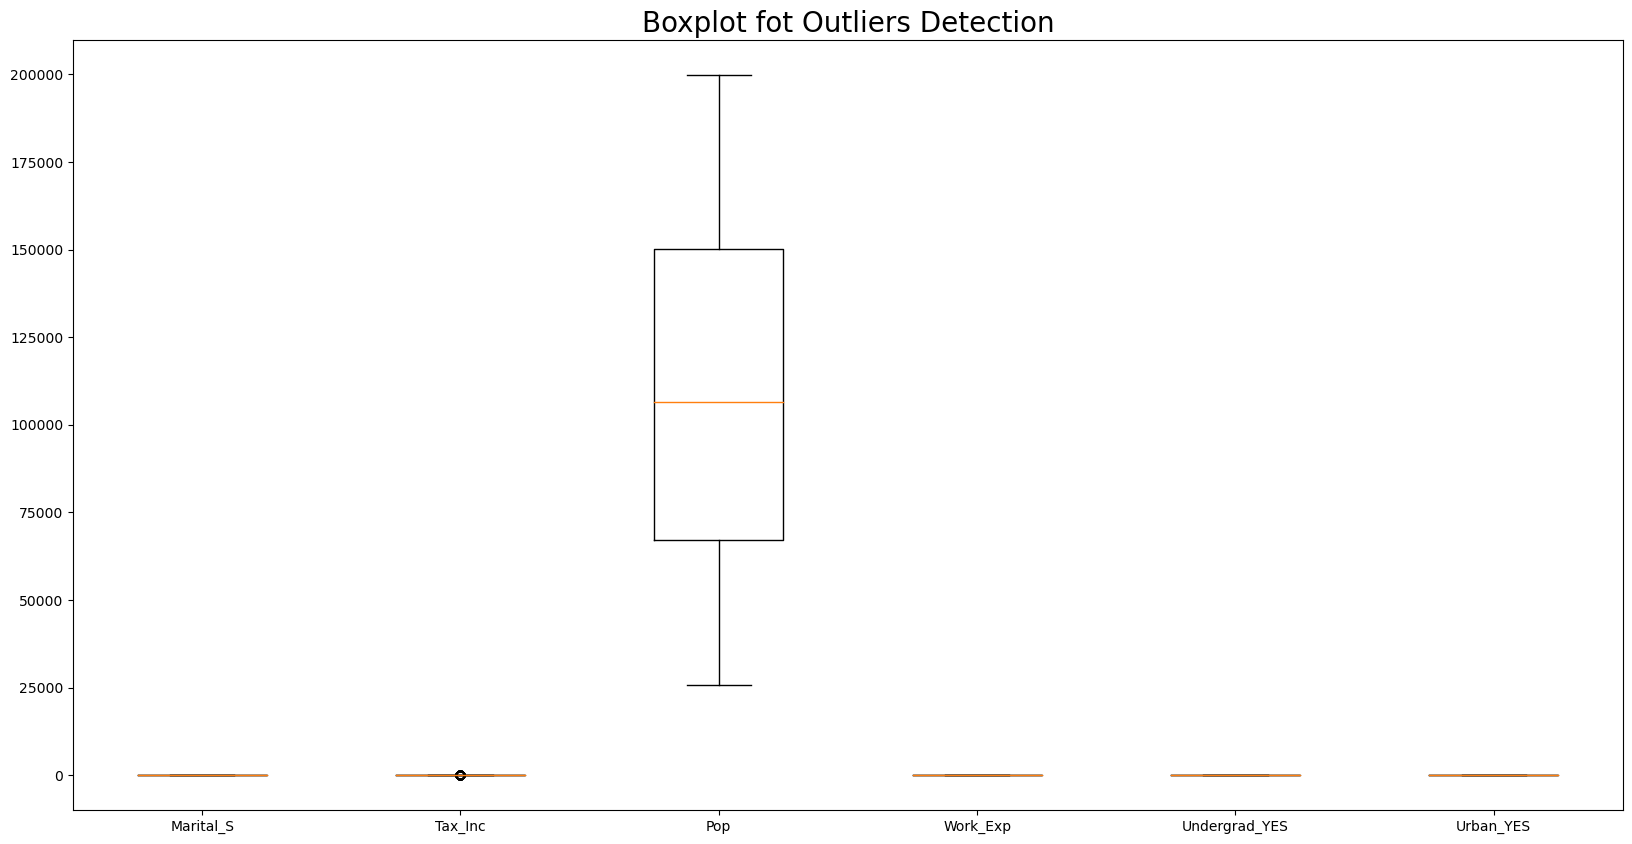

In [41]:
#detecting outlier's 
plt.figure(figsize=(20,10))
plt.boxplot(data,labels=['Marital_S', 'Tax_Inc', 'Pop', 'Work_Exp', 'Undergrad_YES', 'Urban_YES'])
plt.title('Boxplot fot Outliers Detection',fontdict={'fontsize':20})
plt.show()

<h4>Observation :</h4> 
Population has highest mean and high IQR range <br>
Tax_Inc contains outlier 

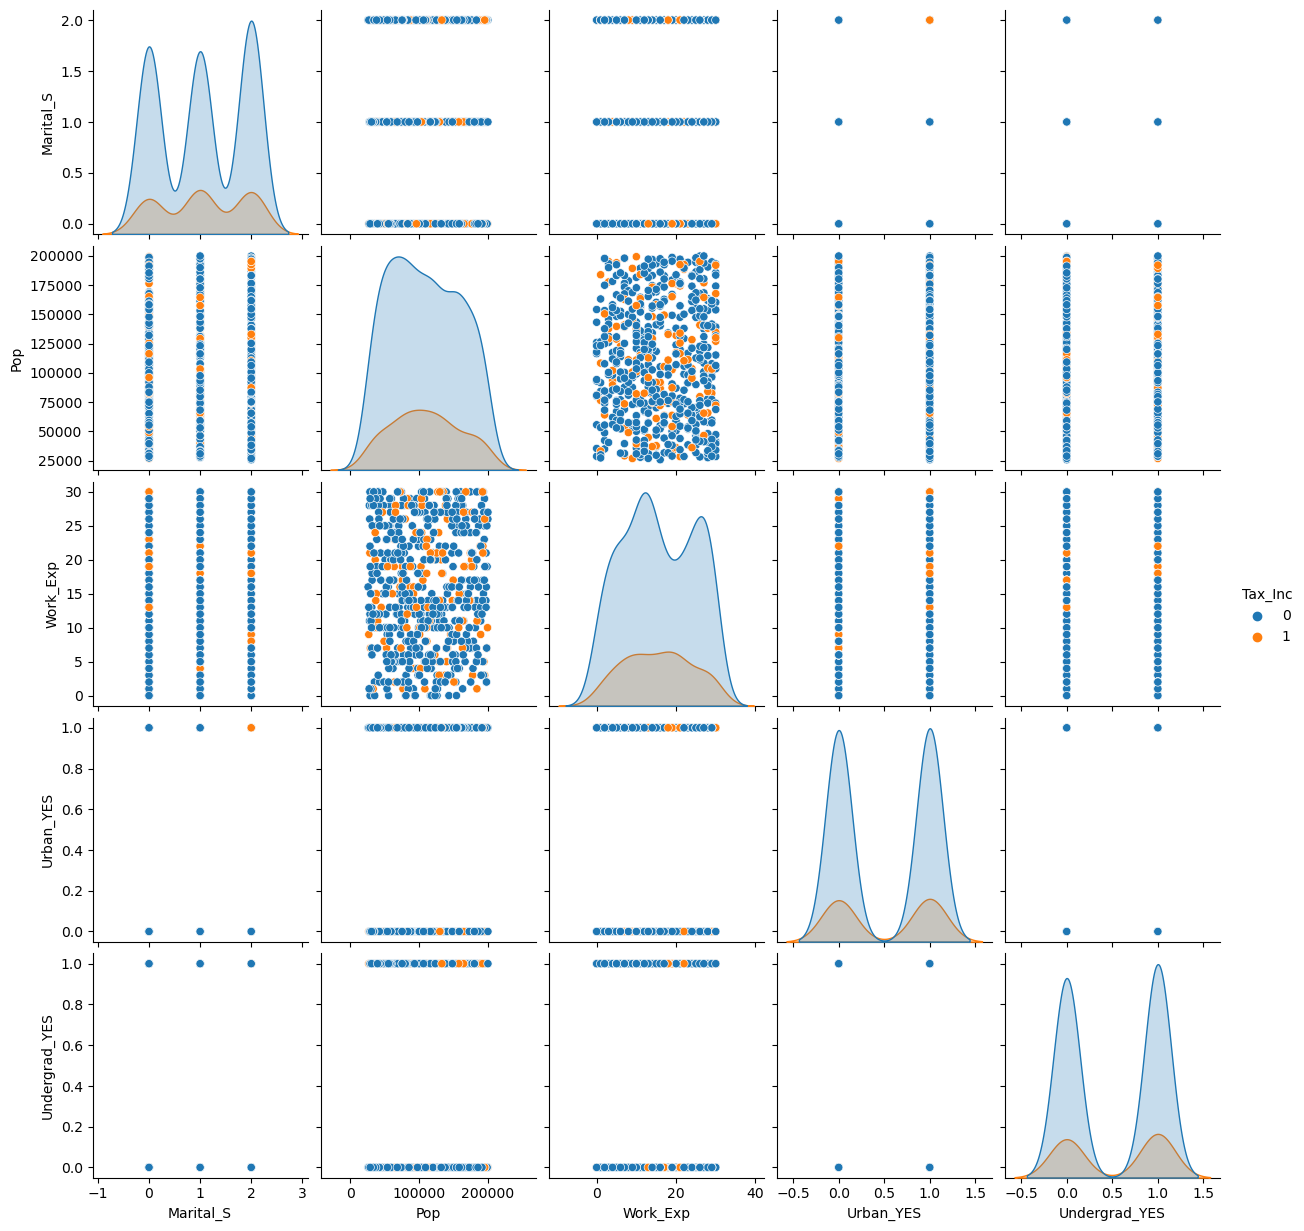

In [42]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data, hue = 'Tax_Inc')
plt.show()

<h4>Observation :</h4> 
    The above data is skewed so we can't make any conclusions from it

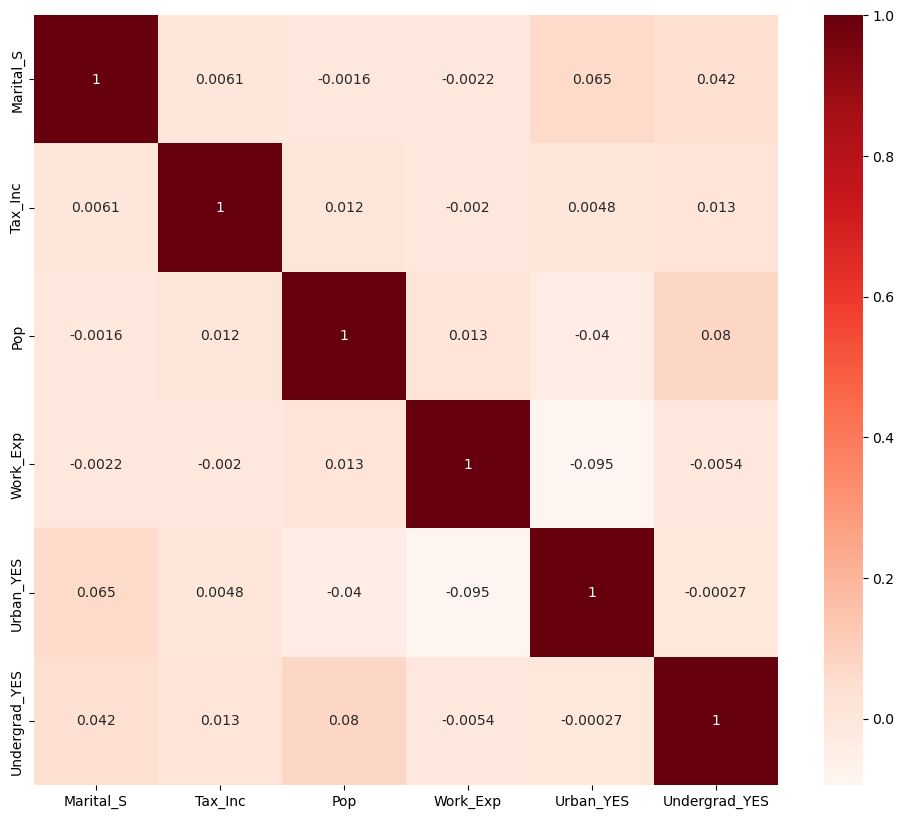

In [43]:
#checking corelation 
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Declaring feature vector and target variable

In [44]:
X=data.drop(['Tax_Inc'],axis=1) #feature vectors
Y=data['Tax_Inc']  #target variable

In [45]:
X

Marital_S     Pop  Work_Exp  Urban_YES  Undergrad_YES
0            2   50047        10          1              0
1            0  134075        18          1              1
2            1  160205        30          1              0
3            2  193264        15          1              1
4            1   27533        28          0              0
..         ...     ...       ...        ...            ...
595          0   39492         7          1              1
596          0   55369         2          1              1
597          0  154058         0          1              0
598          1  180083        17          0              1
599          0  158137        16          0              0

[600 rows x 5 columns]

In [46]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tax_Inc, Length: 600, dtype: int32

## Building Random Forest Model

### A Random Forest Algorithm is a supervised machine learning algorithm which is extremely popular and is used for Classification and Regression problems in Machine Learning.

In [47]:
# random forest Classification
#importing libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

In [48]:
ms=StandardScaler()
X=pd.DataFrame(ms.fit_transform(X))

In [49]:
X

0         1         2         3         4
0    1.160800 -1.178521 -0.629143  0.993355 -1.040833
1   -1.274445  0.508500  0.276370  0.993355  0.960769
2   -0.056822  1.033109  1.634639  0.993355 -1.040833
3    1.160800  1.696831 -0.063197  0.993355  0.960769
4   -0.056822 -1.630532  1.408261 -1.006689 -1.040833
..        ...       ...       ...       ...       ...
595 -1.274445 -1.390432 -0.968710  0.993355  0.960769
596 -1.274445 -1.071672 -1.534655  0.993355  0.960769
597 -1.274445  0.909696 -1.761033  0.993355 -1.040833
598 -0.056822  1.432197  0.163181 -1.006689  0.960769
599 -1.274445  0.991590  0.049992 -1.006689 -1.040833

[600 rows x 5 columns]

In [50]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tax_Inc, Length: 600, dtype: int32

## Model Validation Methods

### Evaluate using Cross Validation

In [51]:
# Evaluate using Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [52]:
kfold = KFold(n_splits=10)
kf_model = RandomForestClassifier()
results = cross_val_score(kf_model, X, Y, cv=kfold)

In [53]:
results

array([0.75      , 0.71666667, 0.66666667, 0.71666667, 0.75      ,
       0.68333333, 0.88333333, 0.7       , 0.75      , 0.83333333])

In [54]:
results.mean()*100.0

74.5

In [55]:
results.std()*100.0

6.370504951205463

## RandomForest Classifiers Using criterion GINI

In [56]:
kf_model = RandomForestClassifier(n_estimators = 100, criterion = 'gini', max_depth= 4)
results = cross_val_score(kf_model, X, Y, cv=kfold)

In [57]:
results

array([0.78333333, 0.76666667, 0.71666667, 0.75      , 0.81666667,
       0.71666667, 0.9       , 0.75      , 0.85      , 0.88333333])

In [58]:
gini_score=results.mean()*100.0
gini_score

79.33333333333333

In [59]:
results.std()*100.0

6.289320754704403

## RandomForest Classifiers Using criterion Entropy 

In [60]:
kf_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth=3)
results = cross_val_score(kf_model, X, Y, cv=kfold)

In [61]:
results

array([0.78333333, 0.76666667, 0.71666667, 0.75      , 0.81666667,
       0.71666667, 0.9       , 0.75      , 0.85      , 0.88333333])

In [62]:
entropy_score=results.mean()*100.0
entropy_score

79.33333333333333

In [63]:
results.std()*100.0

6.289320754704403

### Evaluate using a train and a test set

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state=50)

In [65]:
X_train

0         1         2         3         4
347 -0.056822 -0.557261 -1.761033  0.993355 -1.040833
150 -0.056822  1.064309  1.408261 -1.006689 -1.040833
107 -0.056822 -1.130798 -1.081899  0.993355 -1.040833
16  -1.274445 -1.489632  1.521450 -1.006689  0.960769
162 -0.056822  1.379696  0.615937  0.993355  0.960769
..        ...       ...       ...       ...       ...
70  -1.274445 -0.559008 -1.421466  0.993355  0.960769
132 -1.274445 -0.821694 -0.402764 -1.006689 -1.040833
289  1.160800  1.768144 -0.176386 -1.006689 -1.040833
109 -0.056822  1.402122 -0.855521  0.993355  0.960769
480 -1.274445 -0.732713  1.181882  0.993355 -1.040833

[450 rows x 5 columns]

In [66]:
y_train

347    1
150    0
107    0
16     1
162    0
      ..
70     0
132    0
289    0
109    0
480    0
Name: Tax_Inc, Length: 450, dtype: int32

In [67]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((450, 5), (450,), (150, 5), (150,))

## RandomForest Classifiers Using criterion GINI

In [68]:
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 3, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 66, 'bootstrap': False})


RandomForestClassifier(bootstrap=False, max_depth=66, max_features='sqrt',
                       min_samples_split=5, n_estimators=3)

In [69]:
print(rf_cv.best_score_)

0.17663025488248926


In [247]:
rf = RandomForestClassifier(criterion='gini',bootstrap=False, max_depth=6, max_features='sqrt',
                            min_samples_split=5, n_estimators=3 , random_state= 50)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=6, max_features='sqrt',
                       min_samples_split=5, n_estimators=3, random_state=50)

In [240]:
y_pred = rf.predict(X_test)

In [241]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [242]:
y_train_pd=rf.predict(X_train)

In [243]:
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
cm=confusion_matrix(y_test, y_pred)

Accuracy = 79.33333333333333


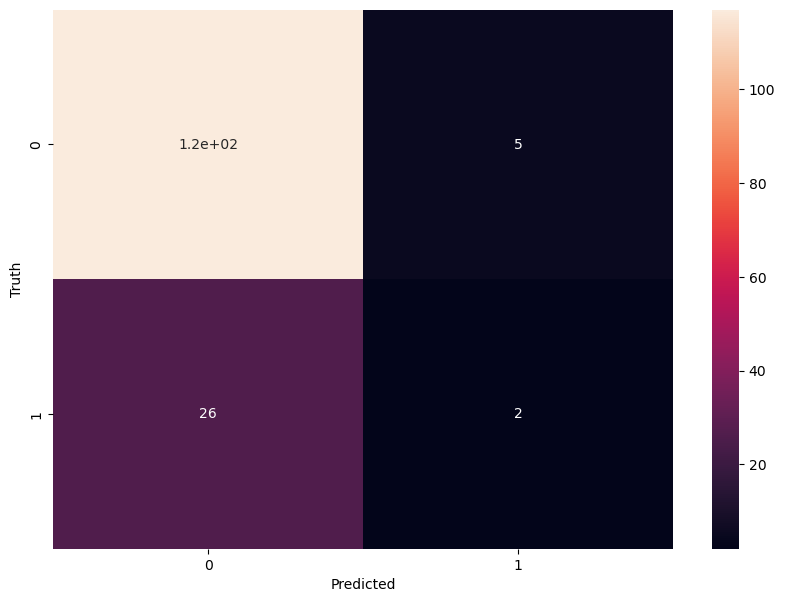

In [244]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [245]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       122
           1       0.29      0.07      0.11        28

    accuracy                           0.79       150
   macro avg       0.55      0.52      0.50       150
weighted avg       0.72      0.79      0.74       150



## Checking for overfitting and underfitting

In [246]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

Training set score: 0.8156
Test set score: 0.7933


The training-set accuracy score is `0.8156` while the test-set accuracy to be `0.7933`. These two values are quite comparable. So, there is no sign of overfitting

## RandomForest Classifiers Using criterion Entropy

In [78]:
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 3, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 66, 'bootstrap': False})


RandomForestClassifier(bootstrap=False, max_depth=66, max_features='sqrt',
                       min_samples_split=5, n_estimators=3)

In [256]:
rf1 = RandomForestClassifier(criterion='entropy',bootstrap=False, max_depth= 5, max_features='sqrt',
                            min_samples_split=5, n_estimators=3 , random_state= 50)
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       max_features='sqrt', min_samples_split=5, n_estimators=3,
                       random_state=50)

In [257]:
y_pred = rf1.predict(X_test)

In [258]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [259]:
y_train_pd=rf1.predict(X_train)

In [260]:
acc1 = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
cm=confusion_matrix(y_test, y_pred)

Accuracy = 79.33333333333333


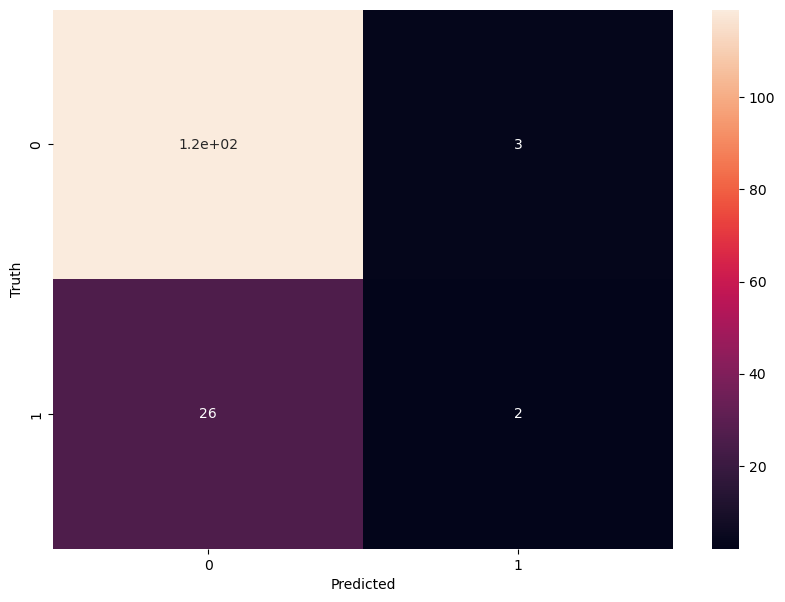

In [261]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [262]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       122
           1       0.40      0.07      0.12        28

    accuracy                           0.81       150
   macro avg       0.61      0.52      0.51       150
weighted avg       0.74      0.81      0.75       150



## Checking for overfitting and underfitting

In [263]:
# Checking for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf1.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rf1.score(X_test, y_test)))

Training set score: 0.8089
Test set score: 0.8067


The training-set accuracy score is `0.8089` while the test-set accuracy to be `0.8067`. These two values are quite comparable. So, there is no sign of overfitting

## Building Random Forest Model using XGBM and LGBM

### GBMs are powerful machine learning models that have been shown to outperform many other types of models, including deep neural networks, in a variety of tasks. LightGBM uses a novel technique called histogram-based binning, allowing it to learn from data more efficiently than traditional GBMs.

In [264]:
# !pip install xgboost
# !pip install lightgbm

In [265]:
# First XGBoost model for Company dataset
from numpy import loadtxt
from xgboost import XGBClassifier

In [266]:
# fit model no training data
xgb_model = XGBClassifier(n_estimators=1000,learning_rate =0.001)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [267]:
# make predictions for test data
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [268]:
# evaluate predictions
accuracy = (accuracy_score(y_test, predictions)*100)

In [269]:
print("Accuracy: %.2f%%" % (accuracy))

Accuracy: 77.33%


In [270]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       122
           1       0.12      0.04      0.06        28

    accuracy                           0.77       150
   macro avg       0.47      0.49      0.46       150
weighted avg       0.68      0.77      0.72       150



In [271]:
# Checking for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(xgb_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(xgb_model.score(X_test, y_test)))

Training set score: 0.8044
Test set score: 0.7733


The training-set accuracy score is `0.8024` while the test-set accuracy to be `0.7778`. These two values are quite comparable. So, there is no sign of overfitting

In [272]:
# second LGBM model for Company dataset
import lightgbm as lgb

In [273]:
d_train = lgb.Dataset(X_train, label=y_train) # here lightgtm uses native method dataset

In [274]:
d_train

In [275]:
params = {} # here is list of parameters to control regularisation
params['learning_rate'] = 0.002, # 0.1,0.3 will discuss in neural network
params['num_iterations'] = 10000
params['boosting_type'] = 'gbdt' # dart
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.3
params['num_leaves'] = 5000
params['max_depth'] = 4

In [276]:
params

{'learning_rate': (0.002,),
 'num_iterations': 10000,
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'metric': 'binary_logloss',
 'sub_feature': 0.3,
 'num_leaves': 5000,
 'max_depth': 4}

In [277]:
lgb_model = lgb.train(params, d_train, 200) # no of trees wants to build

[LightGBM] [Info] Number of positive: 96, number of negative: 354
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.213333 -> initscore=-1.304949
[LightGBM] [Info] Start training from score -1.304949
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [278]:
#Prediction
y_pred = lgb_model.predict(X_test)

In [279]:
predictions = [round(value) for value in y_pred]

In [280]:
accuracy1 = (accuracy_score(y_test, predictions)*100)

In [281]:
print("Accuracy: %.2f%%" % (accuracy1))

Accuracy: 78.00%


In [282]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       122
           1       0.14      0.04      0.06        28

    accuracy                           0.78       150
   macro avg       0.48      0.49      0.47       150
weighted avg       0.69      0.78      0.72       150



In [283]:
#Prediction for train data
y_pred_train = lgb_model.predict(X_train)

In [284]:
predictions = [round(value) for value in y_pred_train]

In [285]:
accuracy2 = round((accuracy_score(y_train, predictions)*100),2)

In [286]:
print("Accuracy: %.2f%%" % (accuracy2))

Accuracy: 80.22%


The training-set accuracy score is `80.95%` while the test-set accuracy to be `77.22%`. These two values are quite comparable. So, there is no sign of overfitting

In [287]:
data = {"MODELS":pd.Series(["KFold Gini Score","KFold Entropy Score","Train-Test Gini Score","Train-Test Entropy Score",
                            "XGBM Model Score","LGBM Model Score"]),
        "Accuracy":pd.Series([gini_score,entropy_score,acc,acc1,accuracy,accuracy1])}
acc_table=pd.DataFrame(data)
acc_table.sort_values(['Accuracy'],ascending=False)

MODELS   Accuracy
3  Train-Test Entropy Score  80.666667
0          KFold Gini Score  79.333333
1       KFold Entropy Score  79.333333
2     Train-Test Gini Score  79.333333
5          LGBM Model Score  78.000000
4          XGBM Model Score  77.333333

<h3>Insights:</h3>
<br>
We have build a classification model using Random Forest algorithms on fraud data treating those who have 
taxable_income <= 30000 as "Risky" and others are "Good"<br>
we have used model validation techniques to find out which technique gives high accuracy for the model<br>
In random forest algorithm we measured score using GINI and ENTROPY methods<br>
The segments which causes to high scale are <b>Work Experience , City Population, Marital status single and undergraduate yes</b><br>
we should focus on segments like <b>Marital status Divorce and Married , and who are not graduates</b> to predict the future analysis on fraud check<br>
So, we see that the Train-Test model validation techniques gives good accuracy than KFold meathod<br>
The model with criterion <b>entropy</b> gives more accuracy rather than criterion <b>gini</b> index<br>
The training-set accuracy score is <b>81%</b> while the test-set accuracy to be <b>80%</b>. These two values are quite comparable. So, there is no sign of overfitting<br>
So, model with criterion <b>Entropy</b> is Generalized(Best fitted).